<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220517_CNN%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# 1. fashin_mnist.load_data() : 데이터 다운로드(mnist_test.csv) → train/test 데이터셋(input/target) 분류 까지 한번에
 - train 데이터셋 : (60000, 28, 28)
 - test 데이터셋 : (10000, 28, 28)


In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
train_input.shape

(60000, 28, 28)

In [5]:
test_input.shape

(10000, 28, 28)

In [6]:
train_scaled = train_input / 255.0

# 2. train 데이터셋 → train / val(검증) 데이터셋으로 다시 나눔
 - train 데이터셋 : (48000, 28, 28)
 - val 데이터셋 : (12000, 28, 28)

In [7]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [8]:
train_scaled.shape

(48000, 28, 28)

# 3. 인공신경망 모델 만들기 : 함수 활용

In [9]:
def model_fn(a_layer=None):
  model = keras.Sequential() # 1.모델 생성(입력/밀집/출력층 등 생성 전)
  model.add(keras.layers.Flatten(input_shape=(28, 28))) # 2.Flatten층 추가
  model.add(keras.layers.Dense(100, activation='relu')) # 3.밀집층 추가
  if a_layer: # 함수 호출시 a_layer를 정의 했다면:
    model.add(a_layer) # 밀집층 추가
  model.add(keras.layers.Dense(10, activation='softmax')) # 4.출력층 추가
  return model # 인스턴스 객체 반환(Sequential 클래스로 인스턴스 객체 생성)

In [10]:
# model_fn().summary() # model.summary()와 같음

# 반환되는 객체를 변수에 담아서 사용하는 방법
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy') # 원-핫 인코딩 하지않은 타깃 사용시 sparse(희소) 손실함수 사용
history = model.fit(train_scaled, train_target, epochs=5, verbose=1) # verbose=0 : 에포크마다 진행막대/손실 등의 지표 생략
# fit() 의 실행결과 → History 클래스 객체를 반환 <tensorflow.python.keras.callbacks.History at 0x7fe38bfc080> 

Epoch 1/5
1500/1500 [==============================] - 7s 2ms/step - loss: 0.5280 - accuracy: 0.8140
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3931 - accuracy: 0.8585
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3539 - accuracy: 0.8720
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3345 - accuracy: 0.8814
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3187 - accuracy: 0.8865


# History 클래스가 갖고 있는 변수와 함수/클래스를 확인해보자 : dir()

In [12]:
dir(history.history) # keys 함수를 사용할 수 있네(= 딕셔너리 형태라는 뜻)
# compile() 메서드의 metrics 매개변수에 'accuracy'를 추가했기 대문에 history 속성에 포함되어 있음

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [13]:
type(history.history)

dict

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [15]:
history.history['loss'] # 각 epoch마다의 손실값이 들어있음

[0.5279532670974731,
 0.3930896818637848,
 0.3538559079170227,
 0.3345435857772827,
 0.318709135055542]

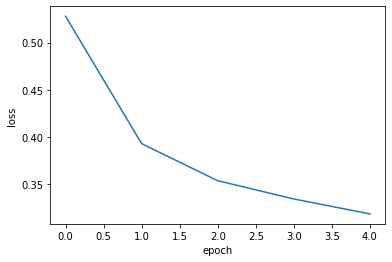

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) # 리스트를 plot 할 때 인덱스가 x축 → 0부터 시작
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

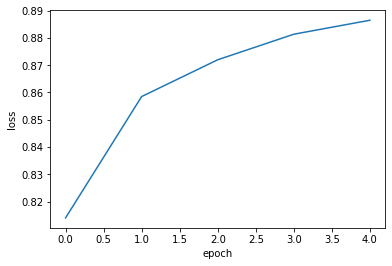

In [17]:
plt.plot(history.history['accuracy']) # 리스트를 plot 할 때 인덱스가 x축 → 0부터 시작
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

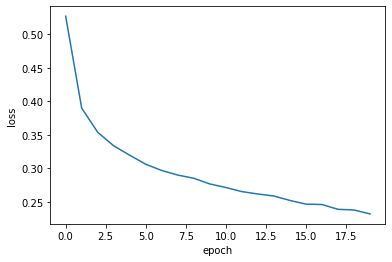

In [18]:
# epoch를 늘려서 훈련해보자(5 → 10회)
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 에포크에 대한 과대/과소적합 파악 : 훈련세트의 손실과 검증세트 손실 비교
 - 인공 신경망 모델에서 최적화 하는 대상은 정확도가 아닌 "손실 함수"
 - 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있음

In [19]:
# 에포크마다 훈련세트의 손실과 정확도를 확인 할 수 있었다.
# 모델 훈련시 검증세트도 validation_data 매개변수에 넣어 활용 할 수 있다.

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [20]:
history.history.keys() # 모델 훈련시 검증세트도 매개변수에 넣어 전달했더니 : 'val_loss', 'val_accuracy' 추가 됨

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

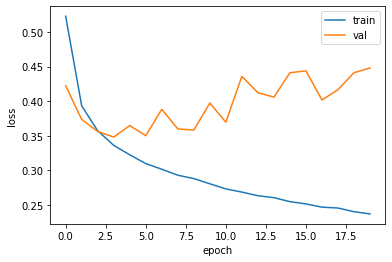

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

훈련 손실은 꾸준히 감소 → 전형적인 과대적합 모델이 만들어짐

검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 → 검증세트에 대한 손실이 감소 + 검증세트에 대한 정확도 증가

# 과대 적합을 막기 위한 신경망에 특화된 규제 방법
 - 하이퍼파라미터 중 **옵티마이저를 변경**하여 과대적합 완화 : RMSprop(defalut) → Adam(대중적)
 - **+ 옵티마이저 학습률 조절**
 - 드롭아웃 : 훈련과정에서 일부 뉴런을 꺼서(출력을 0으로 만들어) 특정 뉴런에 과대하게 의존하는 것을 줄여 안정적인 예측가능
 - **+ 드롭아웃할 뉴런 개수 조절**

## Dropout() 클래스
- 층처럼 사용되지만 훈련되는 파라미터는 없음
- 드롭아웃은 모델 만들때 층으로 넣는다.
- 훈련시에만 적용되고, 평가/예측시 적용되지 않는다 : 케라스가 자동으로 해줌

In [28]:
# Dropout 클래스로 드롭아웃 층 추가
# 층처럼 사용되지만 훈련되는 파라미터는 없음

model = model_fn(keras.layers.Dropout(0.3)) # 앞의 층의 출력을 30%만 랜덤하게 0으로 만듬
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


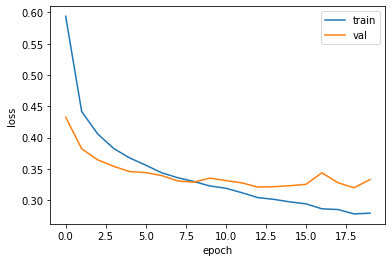

In [29]:
# 모델에 드롭아웃 층을 추가 → 학습
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

검증세트의 손실이 작고 에포크 증가에도 큰 증가 없음

# 모델 저장과 복원
 - 파라미터 저장 : save_weights() 메서드
 - 모델구조+파라미터 저장 : save() 메서드
 - 저장시 확장자가 '.h5'